## Dependencias

In [8]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
n = 10**6

In [3]:
#Distribución base
X = np.random.exponential(scale=1,size=n)

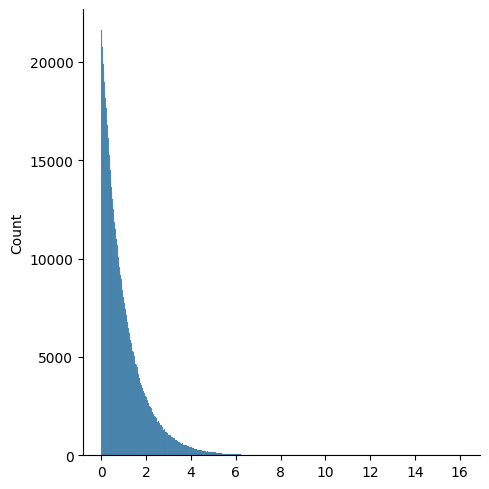

In [4]:
sns.displot(X)

In [5]:
#Distribución teórica (para comparar)
Y = np.random.chisquare(df=6, size=n)

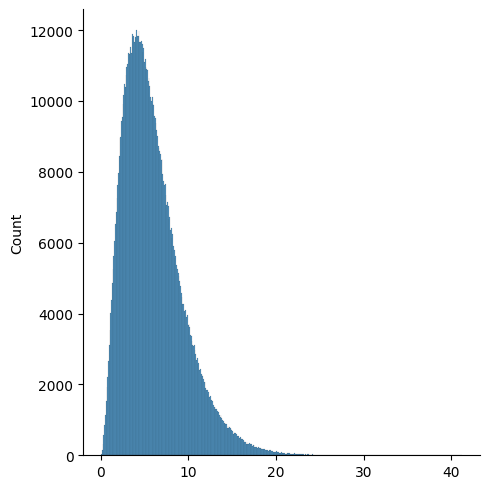

In [7]:
sns.displot(Y)

In [9]:
#Función de densidad para distribución teórica chi2
chi2 = stats.chi2(6)

In [11]:
#Cálculo de pesos
W = chi2.pdf(X)/np.exp(-X)
W/=W.sum()

In [12]:
#SIR para convertir de exponencial a chi2
SIRY = np.random.choice(X,size=n,replace=True,p=W)

<Axes: ylabel='Count'>

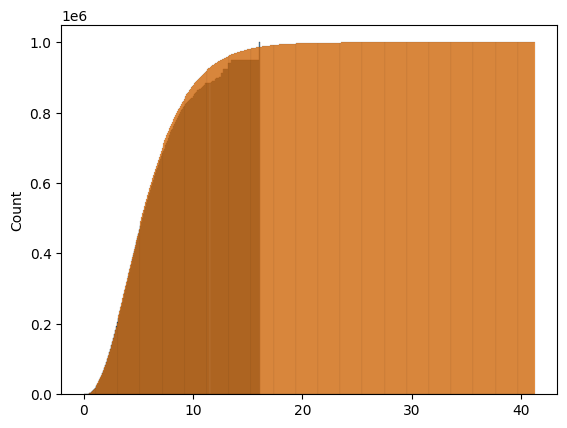

In [15]:
sns.histplot(SIRY, label='SIR',cumulative=True)
sns.histplot(Y, label='Chi2',cumulative=True)

In [16]:
stats.ks_2samp(SIRY,Y)

KstestResult(statistic=0.04828100000000002, pvalue=0.0, statistic_location=12.03243904767977, statistic_sign=-1)

In [17]:
#Distribución F(4,25) teórica
Z = np.random.f(4,25,size=n)

In [18]:
#Función de densidad para distribución teórica F
f = stats.f(4,25)

In [19]:
W = f.pdf(SIRY)/chi2.pdf(SIRY)
W/=W.sum()

In [20]:
SIRZ = np.random.choice(SIRY,size=n,replace=True,p=W)

<Axes: ylabel='Count'>

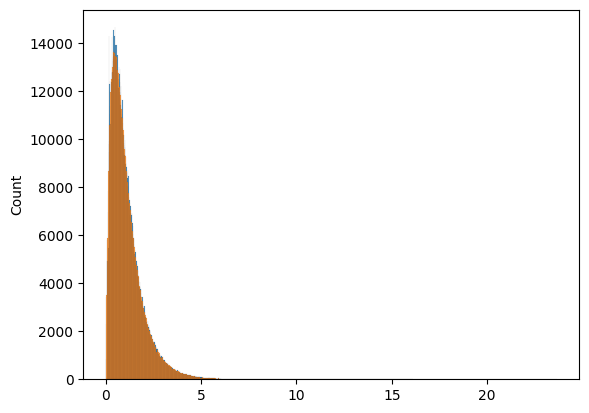

In [23]:
sns.histplot(SIRZ, label='SIR F')
sns.histplot(Z, label='F')

In [24]:
stats.ks_2samp(SIRZ,Z)

KstestResult(statistic=0.012967000000000003, pvalue=1.8662224697638347e-73, statistic_location=0.15836189595596933, statistic_sign=-1)